# 📘 Notebook: `01_data_generation.ipynb`

## Overview

This notebook is responsible for **creating a synthetic dataset** that simulates a real-world binary classification problem:
**distinguishing avocados from mangos based on physical characteristics**.

The dataset is intentionally designed to:

* Follow **simple but realistic business rules**
* Include **overlapping feature distributions**
* Contain **dirty / anomalous data** to reflect real-world conditions

This notebook covers:

1. Synthetic data generation (ground truth)
2. Basic data cleaning
3. Exploratory visualization
4. Persisting the processed dataset for downstream training

## 1. Synthetic Data Generation (Ground Truth)

In this section, we create a synthetic dataset that represents a simplified real-world classification problem:
**distinguishing avocados from mangos based on physical characteristics**.

### Problem Assumptions
- **Avocados** tend to be heavier and have rougher skin.
- **Mangos** tend to be lighter and have smoother skin.
- Feature distributions are intentionally overlapping to avoid a trivial classification task.

A fixed random seed is used to ensure reproducibility across runs.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization configuration
sns.set_theme(style="whitegrid")

# --- 1. GROUND TRUTH DEFINITION ---
# We are going to create 1000 fruits.
# Business rules (simplified):
# - Avocados: Heavier, rough skin (high texture), dark/green color.
# - Mangos: Lighter, smooth skin (low texture), yellow/red color.

np.random.seed(42)  # Seed for reproducibility 
n_samples = 500

# --- GENERATING AVOCADOS ---
# Weight: Normal distribution centered at 200g (+- 30g)
avocados = pd.DataFrame({
    'weight_g': np.random.normal(200, 30, n_samples),
    'skin_roughness': np.random.normal(8, 1.5, n_samples),  # Scale 1–10 (8 is very rough)
    'is_avocado': 1  # Label (Target): 1 = Yes
})

# --- GENERATING MANGOS ---
# Weight: Normal distribution centered at 150g (+- 40g)
# Slight overlap with avocado weights
mangos = pd.DataFrame({
    'weight_g': np.random.normal(150, 40, n_samples),
    'skin_roughness': np.random.normal(3, 1.5, n_samples),  # Scale 1–10 (3 is smooth)
    'is_avocado': 0  # Label (Target): 0 = No (It is a mango)
})

# --- DATASET MERGING ---
df = pd.concat([avocados, mangos]).sample(frac=1).reset_index(drop=True)

# Adding some "noise" or dirty data (very common in real-world scenarios)
# Let's assume the sensor failed for some fruits and produced negative values
# (physically impossible)
df.loc[0:5, 'weight_g'] = -50

print(f"Dataset generated with {len(df)} fruits.")
df.head()

Dataset generated with 1000 fruits.


,weight_g,skin_roughness,is_avocado
0,-50.0,4.501569,0
1,-50.0,5.542577,0
2,-50.0,10.514656,1
3,-50.0,2.556780,0
4,-50.0,7.062772,1


### Output

At this stage, we have generated a labeled dataset containing:
- Fruit weight (grams)
- Skin roughness (scale 1–10)
- Binary target label (`is_avocado`)

The dataset includes both fruit types and reflects realistic variability.

## 2. Data Cleaning and Exploratory Visualization

Before training any model, it is critical to validate data quality.

In this step:
- We remove physically impossible measurements (negative weights).
- We visually explore the feature space to understand class separability.
- We identify potential overlap regions where classification may be ambiguous.

Removing invalid data (weight < 0)...


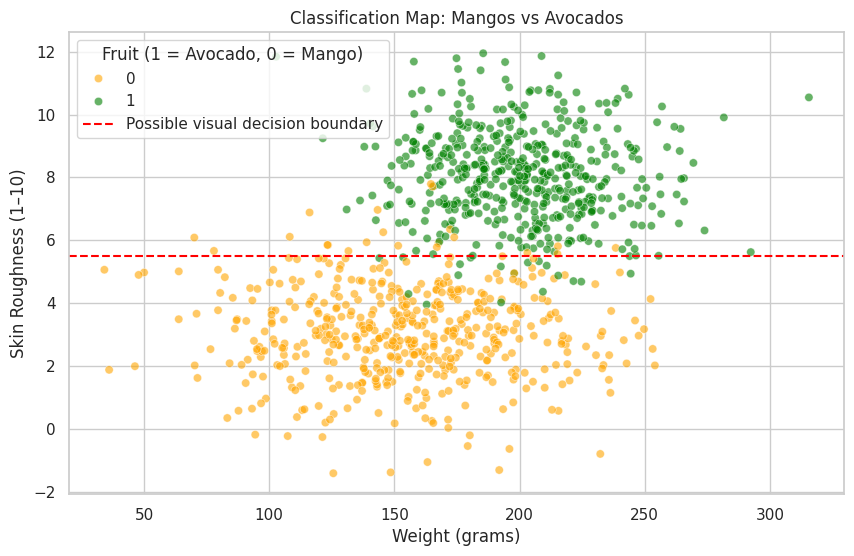

Clean dataset saved to 'data/processed/fruits_dataset.csv'


In [2]:
# --- 2. DATA CLEANING ---
# Must detect anomalies before training.
# Rule: Weight cannot be negative.

print("Removing invalid data (weight < 0)...")
df_clean = df[df['weight_g'] > 0].copy()

# --- 3. VISUALIZATION ---
plt.figure(figsize=(10, 6))

# Scatter plot: X-axis = Weight, Y-axis = Skin Roughness
sns.scatterplot(
    data=df_clean,
    x='weight_g',
    y='skin_roughness',
    hue='is_avocado',  # Color by avocado vs mango
    palette={0: 'orange', 1: 'green'},  # 0 = Mango (Orange), 1 = Avocado (Green)
    alpha=0.6  # Transparency to visualize overlap
)

plt.title("Classification Map: Mangos vs Avocados")
plt.xlabel("Weight (grams)")
plt.ylabel("Skin Roughness (1–10)")
plt.axhline(y=5.5, color='red', linestyle='--', label='Possible visual decision boundary')
plt.legend(title="Fruit (1 = Avocado, 0 = Mango)")
plt.show()

# --- 4. DATA SAVING ---
# Save the cleaned dataset for the next phase (Training)
# Using the Docker-mapped directory
import os
os.makedirs('../data/processed', exist_ok=True)
df_clean.to_csv('../data/processed/fruits_dataset.csv', index=False)
print("Clean dataset saved to 'data/processed/fruits_dataset.csv'")

### Resulting Dataset

After cleaning:
- All remaining observations satisfy domain constraints.
- The dataset is suitable for supervised learning.

The cleaned dataset is saved to disk and will be reused in the training notebook, ensuring a clean separation between data preparation and modeling.